In [ ]:
!pip install joblib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib
import json

In [ ]:
data = pd.read_csv('prepared_internet_service_churn.csv')
data.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.140000,0,8.4,2.3,0,0
1,0,0,8.22,0,0.716039,0,0.0,0.0,0,1
2,1,0,8.91,16,0.000000,0,13.7,0.9,0,1
3,0,0,6.87,21,0.716039,1,0.0,0.0,0,1
4,0,0,6.39,0,0.716039,0,0.0,0.0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             72274 non-null  int64  
 1   is_movie_package_subscriber  72274 non-null  int64  
 2   subscription_age             72274 non-null  float64
 3   bill_avg                     72274 non-null  int64  
 4   reamining_contract           72274 non-null  float64
 5   service_failure_count        72274 non-null  int64  
 6   download_avg                 72274 non-null  float64
 7   upload_avg                   72274 non-null  float64
 8   download_over_limit          72274 non-null  int64  
 9   churn                        72274 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.5 MB


In [ ]:
X = data.drop('churn', axis=1)
y = data['churn']

In [ ]:
X.iloc[72273]

,72273
is_tv_subscriber,1.00
is_movie_package_subscriber,1.00
subscription_age,0.01
bill_avg,0.00
reamining_contract,0.82
service_failure_count,0.00
download_avg,0.00
upload_avg,0.00
download_over_limit,0.00


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.47603011, -0.7091697 ,  4.66833504, ..., -0.55804758,
        -0.19320867, -0.20821312],
       [-2.10070746, -0.7091697 ,  2.8353894 , ..., -0.69087873,
        -0.42807238, -0.20821312],
       [ 0.47603011, -0.7091697 ,  3.17445978, ..., -0.47423745,
        -0.33616919, -0.20821312],
       ...,
       [ 0.47603011, -0.7091697 , -1.19414255, ..., -0.66715888,
        -0.40764945, -0.20821312],
       [-2.10070746, -0.7091697 , -1.19905662, ..., -0.69087873,
        -0.42807238, -0.20821312],
       [ 0.47603011,  1.41009972, -1.19905662, ..., -0.69087873,
        -0.42807238, -0.20821312]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
clf = lgb.LGBMClassifier()

In [ ]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8, 16, 24],
    'num_leaves': [6, 8, 12, 16],
    'boosting_type' : ['gbdt', 'dart'],
    }

grid = GridSearchCV(clf, gridParams, verbose=1, cv=4, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[LightGBM] [Info] Number of positive: 28162, number of negative: 22429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1150
[LightGBM] [Info] Number of data points in the train set: 50591, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.556660 -> initscore=0.227619
[LightGBM] [Info] Start training from score 0.227619


GridSearchCV(cv=4, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.005, 0.01],
                         'n_estimators': [8, 16, 24],
                         'num_leaves': [6, 8, 12, 16]},
             verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'boosting_type': 'gbdt', 'learning_rate': 0.01, 'n_estimators': 24, 'num_leaves': 16}
0.9359569961365661


In [ ]:
best_model = grid.best_estimator_

In [ ]:
y_pred=best_model.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9373


<Axes: >

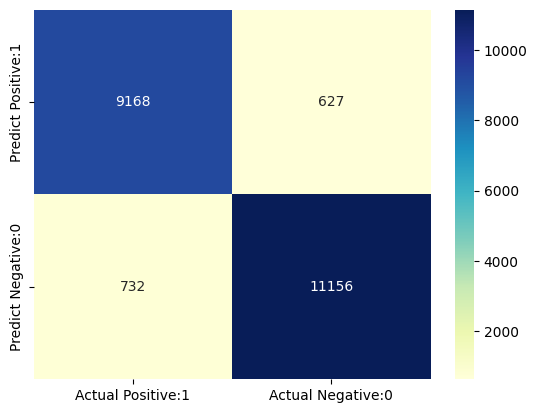

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      9795
           1       0.95      0.94      0.94     11888

    accuracy                           0.94     21683
   macro avg       0.94      0.94      0.94     21683
weighted avg       0.94      0.94      0.94     21683



In [ ]:
joblib.dump(best_model, 'light_gbm.pkl')

['light_gbm.pkl']

In [ ]:
model = joblib.load('light_gbm.pkl')

In [ ]:
y_pred_1 = model.predict(X_test)

In [ ]:
y_pred_1

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
accuracy=accuracy_score(y_test, y_pred_1)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_1)))

LightGBM Model accuracy score: 0.9373


In [ ]:
json.dump( y_pred.tolist(), open( "y_pred.json", 'w' ) )
json.dump( y_test.tolist(), open( "y_test.json", 'w' ) )
json.dump( y_train.tolist(), open( "y_train.json", 'w' ) )